In [46]:
import pandas as pd
import os
import datetime

In [16]:
# Read the data from the CSV file

data = pd.read_csv('../traindata.csv')

In [17]:
data

,author_id,author_fullname,author_verified,author_desc,author_nickname,author_digg,author_followers,author_following,author_heart,author_video,...,collect_count,play_count,share_count,comment_count,digg_count,repost_count,video_height,video_width,video_duration,video_ratio
0,6631682124809076737,Độ Phùng,True,NaN,mixigaming,794,6800000,1,227600000,851,...,16739,10814373,5731,4189,838584,0,768,576,44,540p
1,6577546061139935234,Tun Phạm Official,True,INSTARGRAM: Tunhaycuoi (👇 𝐋𝐈𝐍𝐊)\nFB: Tun Phạm ...,tunpham97,5219,3400000,141,107700000,905,...,8768,7164102,39678,9243,339483,0,1024,576,30,540p
2,6682331154392073218,Hoàng Hôn 💋,True,Contact For Work: \n0965.226.524\nhoangdz23120...,nhathoanghon,21600,3300000,210,75900000,564,...,18468,6271215,1646,1719,332812,0,1024,576,189,540p
3,6943135710875812866,Oppa Huy IDol,True,Kênh YOUTUBE : Oppa Huy IDol 👆\nContact 📨 : op...,huyseoul_idol,1865,8500000,3,252300000,1179,...,16366,5479285,1195,979,226264,0,1024,576,59,540p
4,6631682124809076737,Độ Phùng,True,NaN,mixigaming,794,6800000,1,227600000,851,...,9696,8894972,2000,1980,639948,0,768,576,94,540p
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,7391381100839371777,6623 QUÂN SỰ,False,NaN,6623quansu,60,20200,13,573500,25,...,9584,2757308,3753,5471,171350,0,1024,576,39,540p
321,6918910425120818178,60giay.com,True,📲 KÊNH TIN TỨC ĐỜI SỐNG XÃ HỘI 🇻🇳\nHotline: 09...,60giay.com,7721,8000000,20,684400000,6203,...,2692,2858920,1814,2791,124740,0,1024,576,31,540p
322,7388100226978399250,nhật kí của t !?,False,NaN,ieutoanvl,17,364,3,3823,7,...,347,31778,676,36,2882,0,1024,576,18,540p
323,6636780365493321729,HuyR,True,Hehe :)),huyrmusic,694,573600,42,5000000,115,...,46,36698,1,22,1394,0,1024,576,235,540p


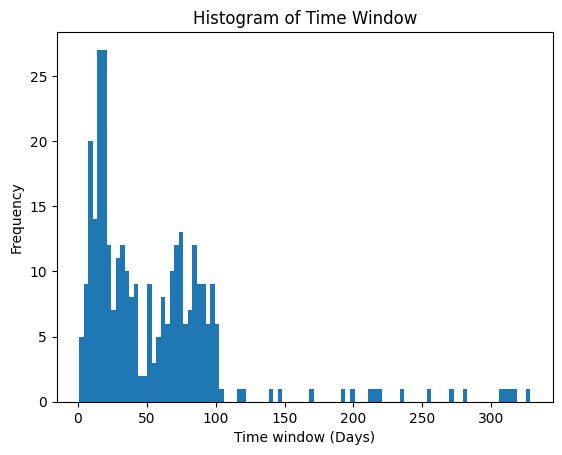

AttributeError: 'DataFrame' object has no attribute 'count_values'

In [51]:
# Get current time
current_time = datetime.datetime.now()

# Calculate time window
data["time_window"] = current_time - pd.to_datetime(data["create_time"])

# Histogram of the time window
plt.hist(
    data["time_window"].dt.total_seconds() / (60 * 60 * 24), bins=100
)  # Convert to days for better visualization
plt.xlabel("Time window (Days)")
plt.ylabel("Frequency")
plt.title("Histogram of Time Window")
plt.show()

# Show the row with time window less or equal to 7 days
print(data[data["time_window"] <= pd.Timedelta(days=7)])

threshold = (data["time_window"].quantile(0.25) + data["time_window"].quantile(0.75)) / 2
print(f"Threshold: {threshold}")

In [21]:
print(data.head())  # Display the first few rows
print(data.info())  # Get a summary of the data types and missing values
print(data.describe())  # Get descriptive statistics


             author_id    author_fullname  author_verified  \
0  6631682124809076737           Độ Phùng             True   
1  6577546061139935234  Tun Phạm Official             True   
2  6682331154392073218        Hoàng Hôn 💋             True   
3  6943135710875812866      Oppa Huy IDol             True   
4  6631682124809076737           Độ Phùng             True   

                                         author_desc author_nickname  \
0                                                NaN      mixigaming   
1  INSTARGRAM: Tunhaycuoi (👇 𝐋𝐈𝐍𝐊)\nFB: Tun Phạm ...       tunpham97   
2  Contact For Work: \n0965.226.524\nhoangdz23120...    nhathoanghon   
3  Kênh YOUTUBE : Oppa Huy IDol 👆\nContact 📨 : op...   huyseoul_idol   
4                                                NaN      mixigaming   

   author_digg  author_followers  author_following  author_heart  \
0          794           6800000                 1     227600000   
1         5219           3400000               141     107

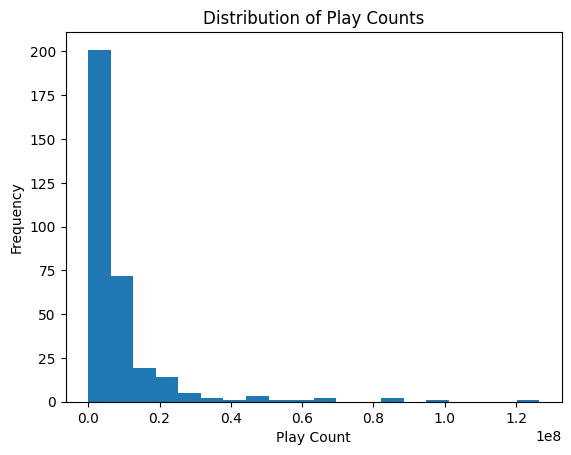

In [24]:
import matplotlib.pyplot as plt
plt.hist(data['play_count'], bins=20)
plt.xlabel('Play Count')
plt.ylabel('Frequency')
plt.title('Distribution of Play Counts')
plt.show()

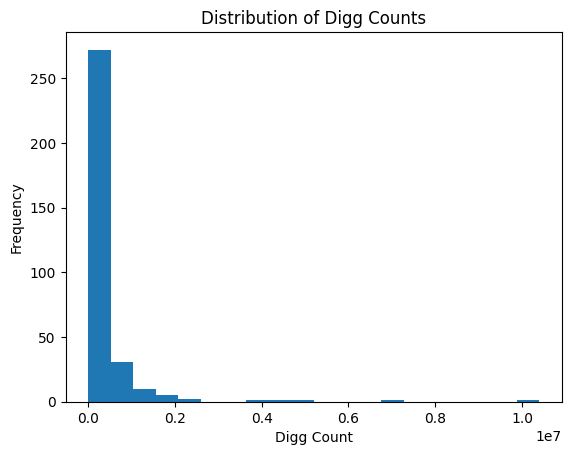

In [25]:
import matplotlib.pyplot as plt

plt.hist(data["digg_count"], bins=20)
plt.xlabel("Digg Count")
plt.ylabel("Frequency")
plt.title("Distribution of Digg Counts")
plt.show()

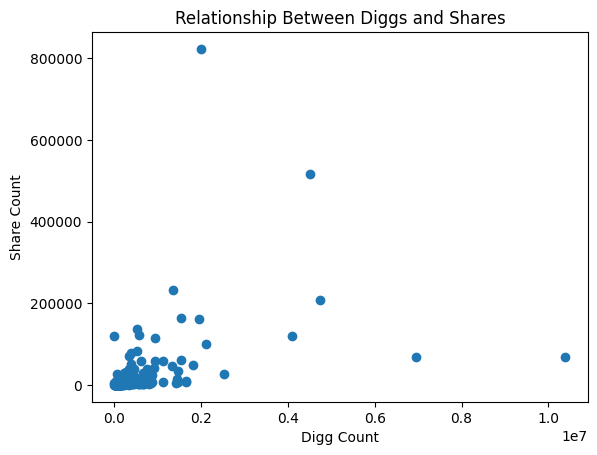

In [26]:
plt.scatter(data['digg_count'], data['share_count'])
plt.xlabel('Digg Count')
plt.ylabel('Share Count')
plt.title('Relationship Between Diggs and Shares')
plt.show()

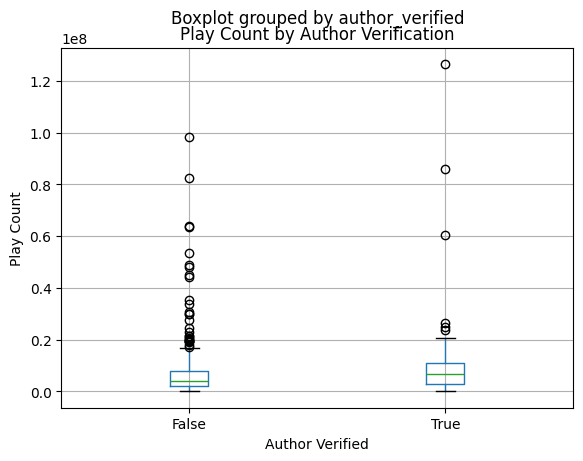

In [27]:
data.boxplot(column='play_count', by='author_verified')
plt.xlabel('Author Verified')
plt.ylabel('Play Count')
plt.title('Play Count by Author Verification')
plt.show()

In [32]:
numeric_data = data.select_dtypes(include=['number'])
# Drop all id columns
numeric_data = numeric_data.drop(columns=['video_id', 'author_id', 'music_id'])
print(numeric_data.corr())
# save the correlation matrix to a CSV file
numeric_data.corr().to_csv('correlation.csv')

                  author_digg  author_followers  author_following  \
author_digg          1.000000         -0.005018          0.371403   
author_followers    -0.005018          1.000000         -0.045789   
author_following     0.371403         -0.045789          1.000000   
author_heart        -0.015269          0.856530         -0.059059   
author_video         0.041345          0.470138          0.024746   
music_duration       0.041320         -0.043166          0.055039   
collect_count        0.066572          0.201074          0.107457   
play_count           0.041871          0.220426          0.104133   
share_count         -0.005616          0.040650          0.351600   
comment_count        0.043750          0.197247          0.259546   
digg_count           0.074362          0.312237          0.063309   
repost_count              NaN               NaN               NaN   
video_height        -0.024959          0.159955          0.015774   
video_width          0.044903     

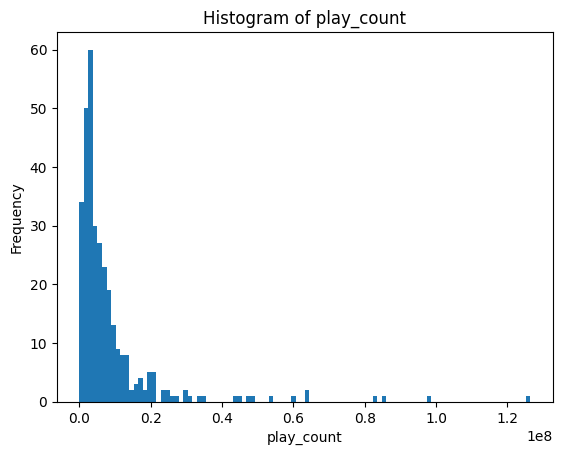

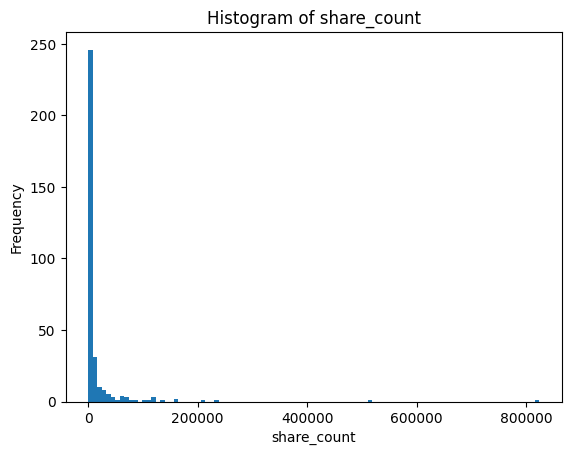

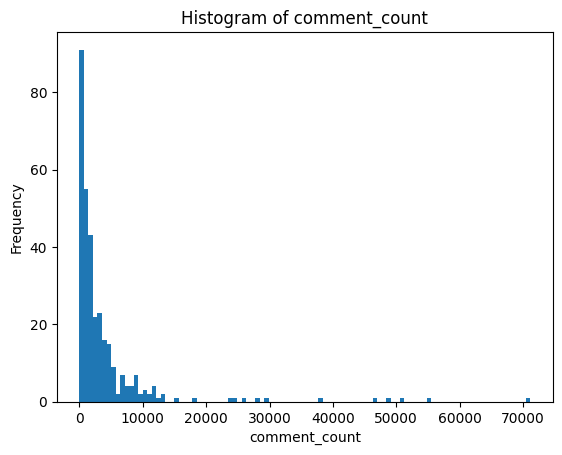

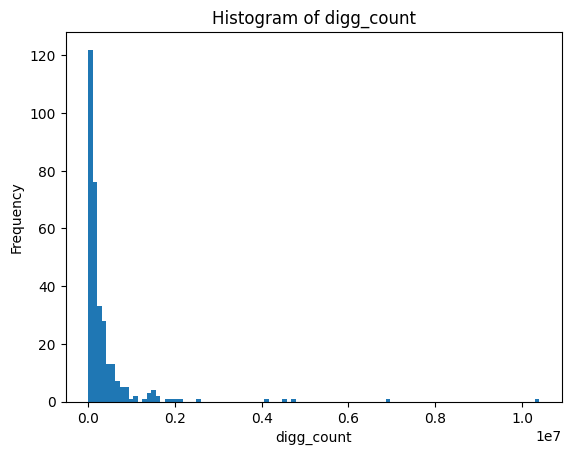

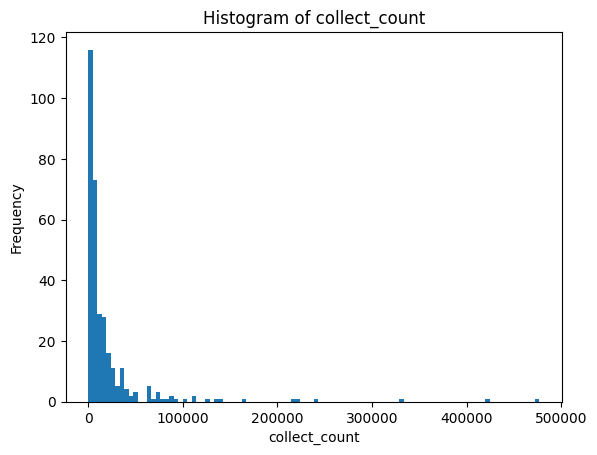

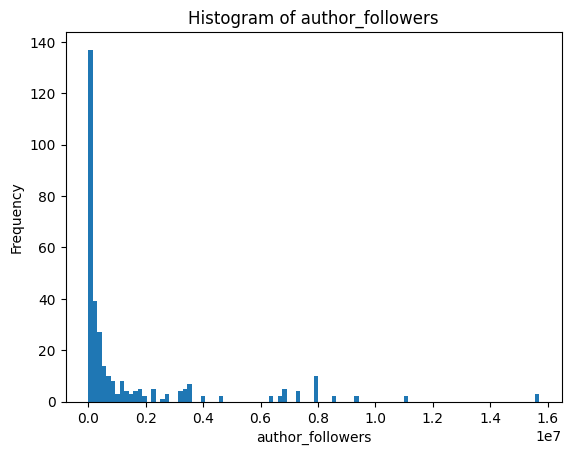

In [34]:
# Plot histograms for each feature
features = [
    "play_count",
    "share_count",
    "comment_count",
    "digg_count",
    "collect_count",
    "author_followers",
]
for feature in features:
    plt.hist(data[feature], bins=100)  # Adjust 'bins' as needed
    plt.title(f"Histogram of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()

In [45]:
# Calculate distribution of share_count
share_count_distribution = data['share_count'].value_counts()

# Calculate distribution of share_count as a percentage
share_count_distribution_percent = data['share_count'].value_counts(normalize=True)
print(share_count_distribution)
print(share_count_distribution_percent)

# Max and min values of share_count
max_share_count = data['share_count'].max()
min_share_count = data['share_count'].min()
print(max_share_count)
print(min_share_count)

share_count
499     3
579     3
1774    2
810     2
676     2
       ..
1688    1
877     1
5307    1
4169    1
40      1
Name: count, Length: 314, dtype: int64
share_count
499     0.009231
579     0.009231
1774    0.006154
810     0.006154
676     0.006154
          ...   
1688    0.003077
877     0.003077
5307    0.003077
4169    0.003077
40      0.003077
Name: proportion, Length: 314, dtype: float64
823379
0


Share Count Threshold: 5095.5


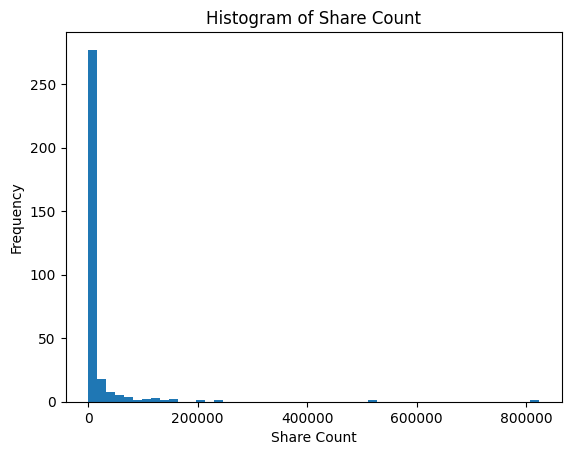

In [41]:
# Calculate the threshold (midpoint of the valley)
threshold = (
    data["share_count"].quantile(0.50) + data["share_count"].quantile(0.75)
) / 2

print(f"Share Count Threshold: {threshold}")
plt.hist(data["share_count"], bins=50)  # Adjust 'bins' as needed
plt.title("Histogram of Share Count")
plt.xlabel("Share Count")
plt.ylabel("Frequency")
plt.show()



Play Count Threshold: 5670287.0


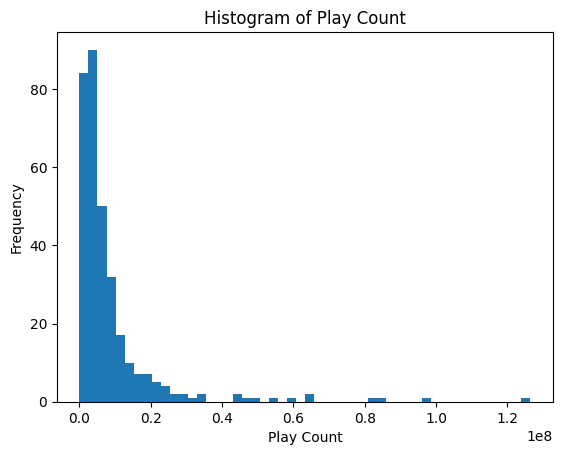

In [38]:
threshold = (data["play_count"].quantile(0.25) + data["play_count"].quantile(0.75)) / 2

print(f"Play Count Threshold: {threshold}")

plt.hist(data["play_count"], bins=50)  # Adjust 'bins' as needed
plt.title("Histogram of Play Count")
plt.xlabel("Play Count")
plt.ylabel("Frequency")
plt.show()